### Projet numéro 8 d'OpenClassRooms,

#### Il nous est laissé libre de choisir n'importe quel sujet tout du moins sous supérvision du mentor. Nous avons choisis un sujet Kaggle, public mis à disposition pour les utilisateurs sous forme de concours, c-à-d qu'en 2019 Kaggle à lancé un concour sur la prédictions de revenus d'un film par rapport au données fournie par le site internet "The Movie Database (TMDB)". Grâce à ses données nous allons devoir prédire les potentiel revenus de plusieurs films à partir de certaines variables. Le but est d'avoir pour chaque "id" de films le revenus attendu au Box-Office.
lien kaggle : https://www.kaggle.com/c/tmdb-box-office-prediction/overview

In [1]:
# Importation des librairies nécessaires à la prédiction de revenus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Permet de masquer les erreurs de code
warnings.filterwarnings("ignore")

import ast  # Abstact Syntax Trees
import itertools  # Iterating tools
import re  # Regular Expressions
from collections import Counter

# Style graphique
plt.style.use('ggplot')

In [2]:
# Importation des données
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
# Vérification du nombre d'individus et de variable dans chaque dataframes
print("Test dataframe : ", test.shape, "\n" "Train dataframe : ", train.shape)

Test dataframe :  (4398, 22) 
Train dataframe :  (3000, 23)


In [4]:
# Affichage de toutes les colonnes dans notre dataframe
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [5]:
# Affichage de l'information de notre dataframe
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

None

### Exploration des données

In [6]:
# Visualisation des caractéristiques de notre dataframe
train.describe(include = 'all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",NaN,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [7]:
# Visualisation de potentiel valeurs manquantes dans notre dataframe
display(train.isna().sum()) # 3000 individus
display(test.isna().sum()) # 4398 individus

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

On peut voir qu'il y a plusieurs valeurs manquantes dans nos variables. Nous n'allons pas modifier le contenue de notre dataframe car nous n'avons pas spécialement besoin de remplir nos valeurs manquantes.

#### Visualisation Graphique

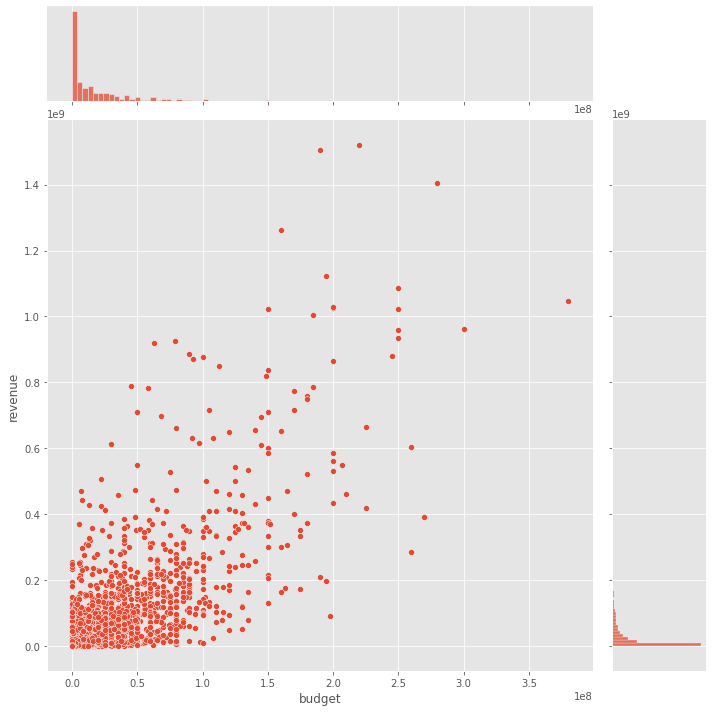

In [8]:
# Visualisation scatterplot entre nos variables 'budget' & 'revenue'
sns.jointplot(data = train, x = "budget", y = "revenue", height = 10, ratio = 5)
plt.show()

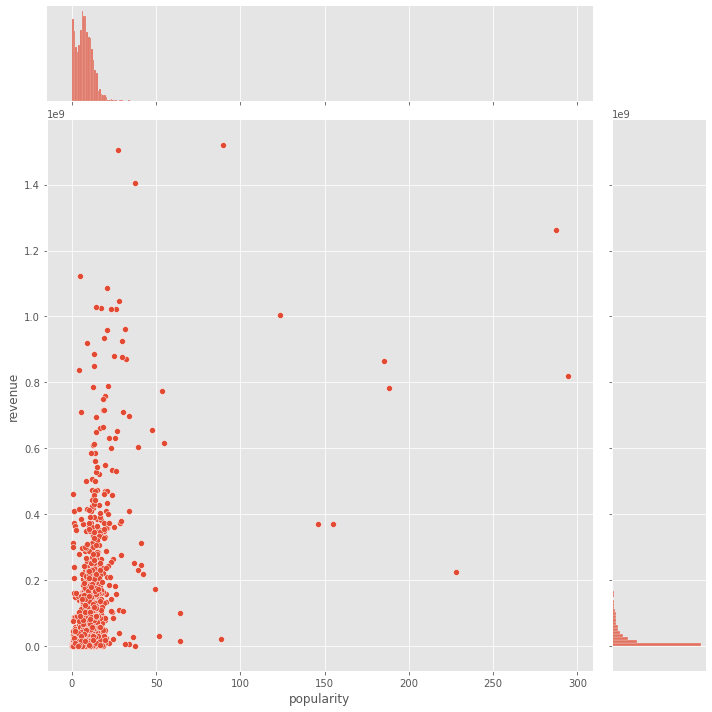

In [9]:
# Visualisation scatterplot entre nos variables 'popularity' & 'revenue'
sns.jointplot(data = train, x = "popularity", y = "revenue", height = 10, ratio = 5)
plt.show()

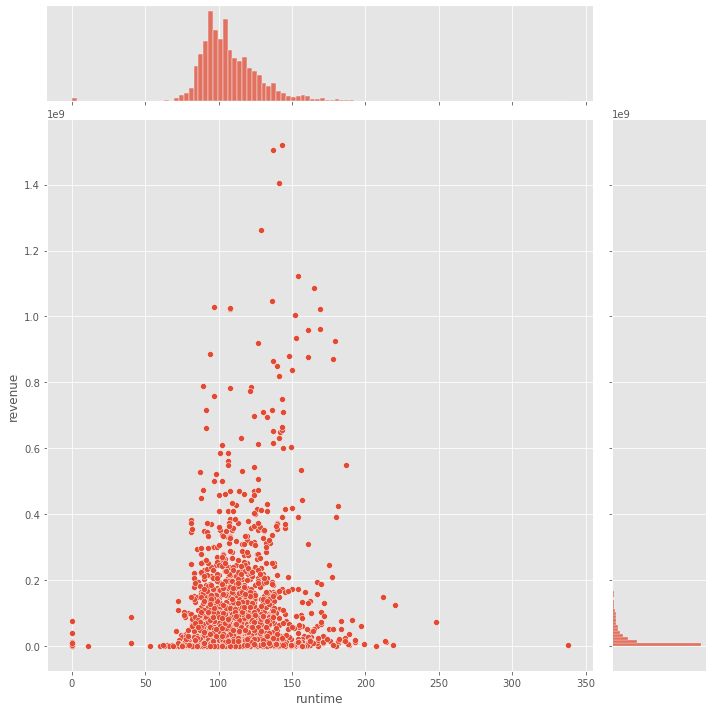

In [10]:
# Visualisation scatterplot entre nos variables 'runtime' & 'revenue'
sns.jointplot(data = train, x = "runtime", y = "revenue", height = 10, ratio = 5)
plt.show()

<AxesSubplot:xlabel='revenue', ylabel='Density'>

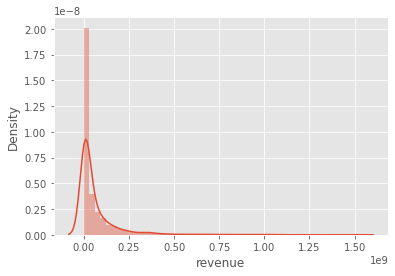

In [11]:
# Vérifions la distribution de notre variable 'revenue'
sns.distplot(train.revenue)

Essayons de voir l'allure de notre distribution si notre variable était à échelle logarithmique.

<AxesSubplot:xlabel='revenue_log', ylabel='Density'>

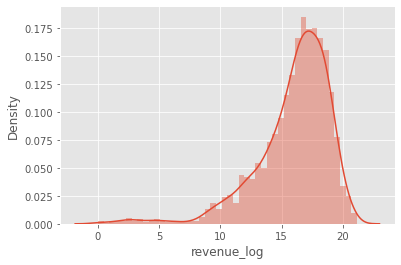

In [12]:
# Création d'une variable qui va stocké notre calcul pour mettre notre variable 'revenue' à echelle logarithmique
train['revenue_log'] = np.log(train['revenue'])

# Visualisation de notre variable 'revenue' à échelle logarithmique
sns.distplot(train.revenue_log)

On peut constater que notre distribution resemble plus à une distribution qui suit une loi normale.

#### Visualisation temporelle des sortis de film

In [13]:
vis_train = train.copy()

# Visualiastion du nombre de film sorti par an par rapport aux nombres total d'individus dans notre dataframe 'train'
# Création de 3 variables qui va stocké la date décomposé de l'individu avec la fonction 'split' qui va départager les valeurs entre les '/'
# le paramètre 'expand = True' va stocké les valeurs dans les variables crées, la fonction 'replace' va changer les valeurs manquantes 'NaN' en valeur '-1'
vis_train[['release_month','release_day','release_year']] = vis_train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)

# Ajout de l'année correspondant à l'année de sortie du film, dans notre variable 'release_year' les valeurs en dessous de 19 sont
# considéré comme des films datant des années 2000(2000 à 2019) et inversement pour les année 1900(1920 à 1999)
# la condition '< 100' éxiste car il y a des valeurs contenant 4 chiffres dans la variable 'release_year' et pour ne pas changer
# ses valeurs cette condition existe
vis_train.loc[ (vis_train['release_year'] <= 19) & (vis_train['release_year'] < 100), "release_year"] += 2000
vis_train.loc[ (vis_train['release_year'] > 19)  & (vis_train['release_year'] < 100), "release_year"] += 1900

# Ajout des jours de la semaine dans une variable + le trimestre auquelle apartient la date du film par rapport à l'année
release_date = pd.to_datetime(vis_train['release_date'])
vis_train['release_dayofweek'] = release_date.dt.dayofweek
vis_train['release_quarter'] = release_date.dt.quarter

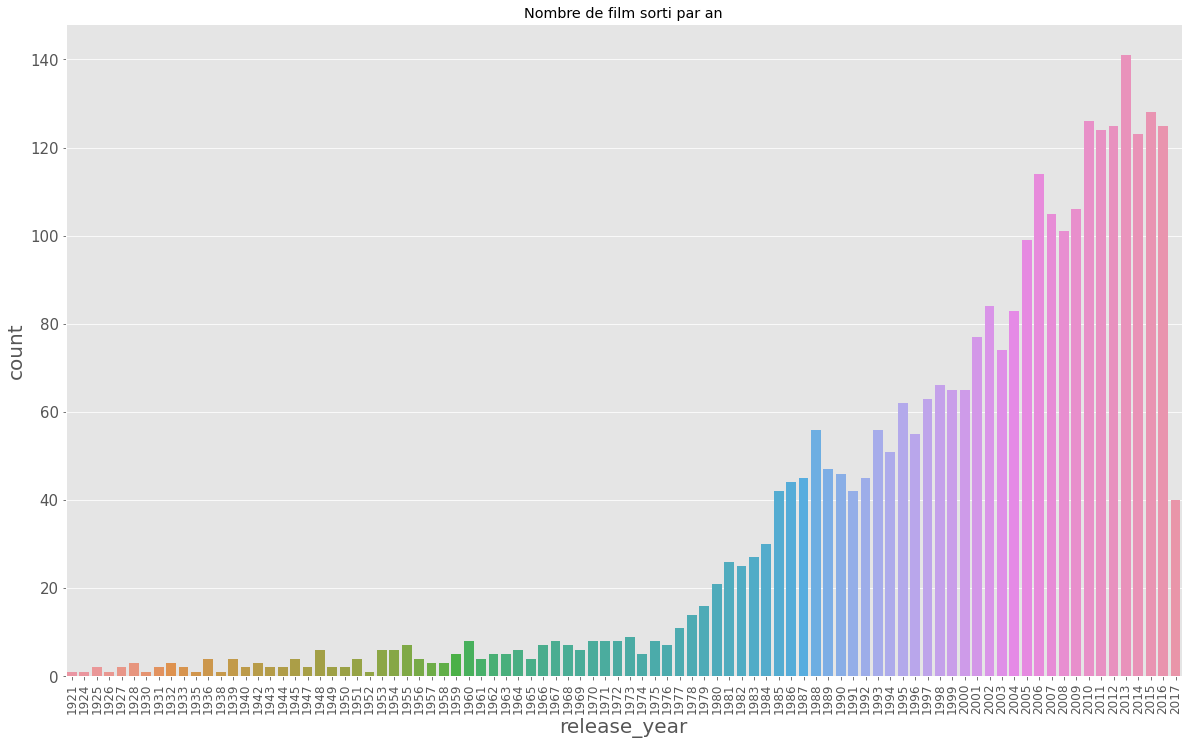

In [14]:
# Visualisation du nombre de film sorti par an
# Création de notre support
plt.figure(figsize=(20,12))

# Création de notre graphique sur notre support, la fonction 'sort_values' est là pour ranger dans l'ordre les années
sns.countplot(vis_train['release_year'].sort_values())

# loc, labels = plt.xticks()
plt.title('Nombre de film sorti par an')

# Modification de nos valeurs sur l'axe x pour une meilleur visibilité
plt.xlabel('release_year', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 90)

# Modification de nos valeurs sur l'axe x pour une meilleur visibilité
plt.ylabel('count', fontsize = 20)
plt.yticks(fontsize = 15)

plt.savefig('Graphs/Nombre de film sorti par an.png')
plt.show()

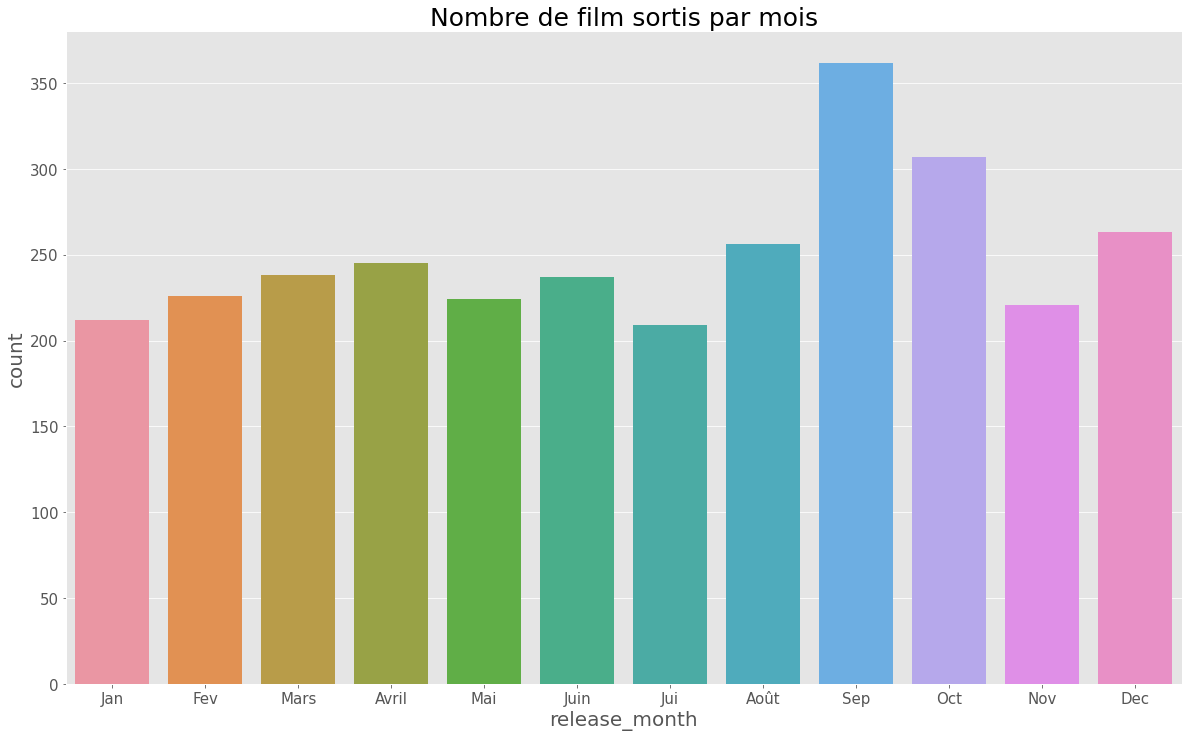

In [15]:
# Visualisation du nombre de film sorti par mois
# Création de notre support
plt.figure(figsize=(20,12))

# Création de notre graphique sur notre support, la fonction 'sort_values' est là pour ranger dans l'ordre les années
sns.countplot(vis_train['release_month'].sort_values())

# Modification de nos valeurs sur l'axe x pour une meilleur visibilité
loc, labels = plt.xticks()
loc, labels = loc, ['Jan', 'Fev', 'Mars', 'Avril', 'Mai', 'Juin', 'Jui', 'Août', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xlabel('release_month', fontsize = 20)
plt.xticks(loc, labels, fontsize = 15)

# Modification de nos valeurs sur l'axe y pour une meilleur visibilité
plt.ylabel('count', fontsize = 20)
plt.yticks(fontsize = 15)

plt.title('Nombre de film sortis par mois', fontsize = 25)
plt.savefig('Graphs/Nombre de film sortis par mois.png')
plt.show()

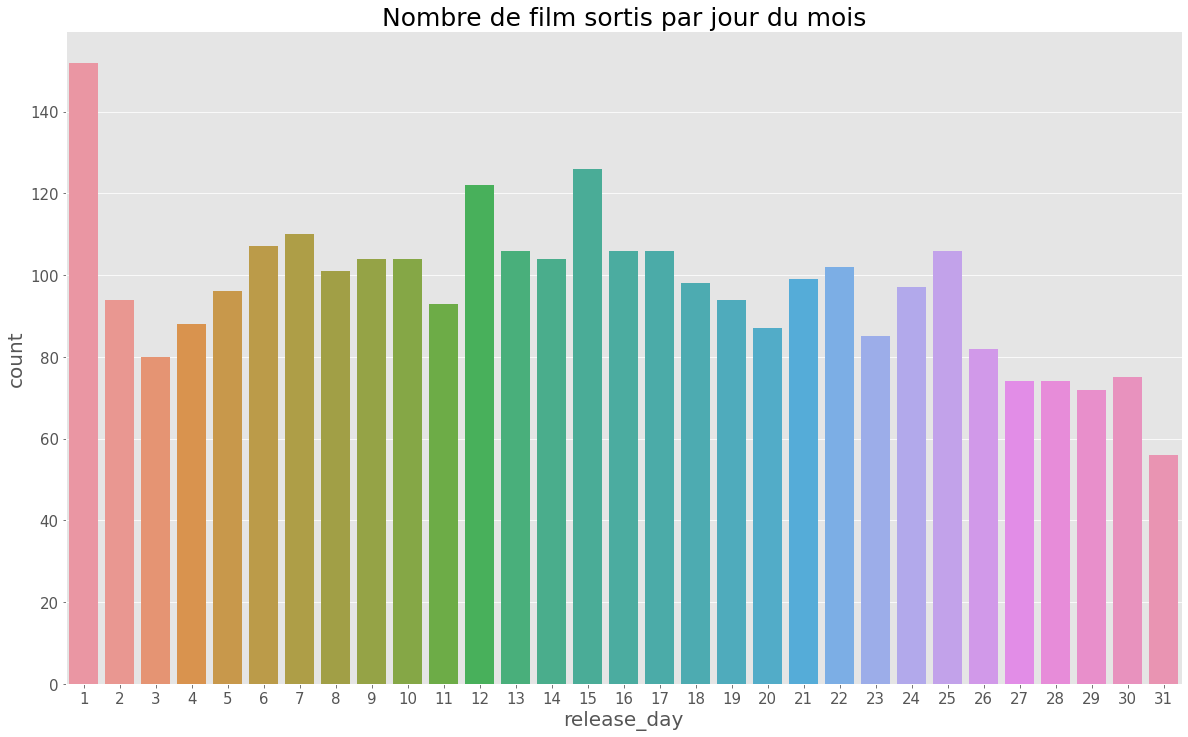

In [16]:
# Visualisation du nombre de film sorti par jour du mois
# Création de notre support
plt.figure(figsize=(20,12))

# Création de notre graphique sur notre support, la fonction 'sort_values' est là pour ranger dans l'ordre les années
sns.countplot(vis_train['release_day'].sort_values())

# Modification de nos valeurs sur l'axe x pour une meilleur visibilité
plt.xlabel('release_day', fontsize = 20)
plt.xticks(fontsize = 15)

# Modification de nos valeurs sur l'axe y pour une meilleur visibilité
plt.ylabel('count', fontsize = 20)
plt.yticks(fontsize = 15)

plt.title('Nombre de film sortis par jour du mois', fontsize = 25)
plt.savefig('Graphs/Nombre de film sortis par jour du mois.png')
plt.show()

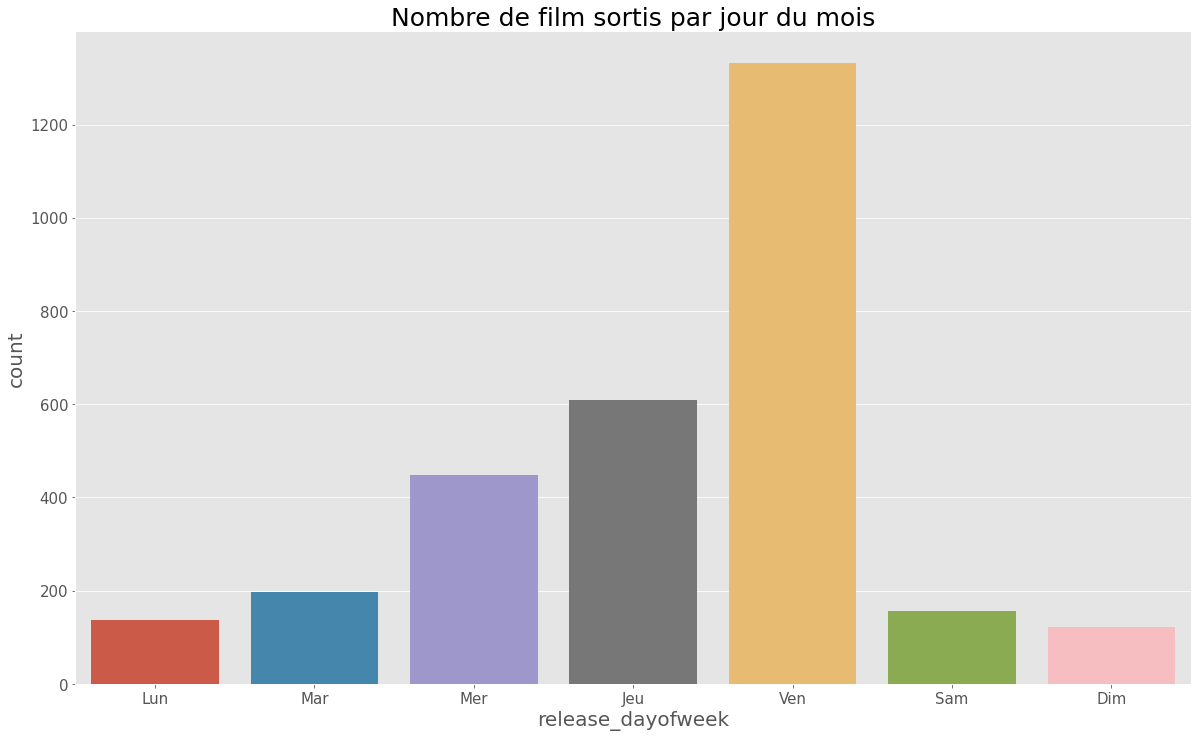

In [17]:
# Visualisation du nombre de film sorti par jour du mois
# Création de notre support
plt.figure(figsize=(20,12))

# Création de notre graphique sur notre support, la fonction 'sort_values' est là pour ranger dans l'ordre les années
sns.countplot(vis_train['release_dayofweek'].sort_values())
loc, labels = plt.xticks()
loc, labels = loc, ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']

# Modification de nos valeurs sur l'axe x pour une meilleur visibilité
plt.xlabel('release_dayofweek', fontsize = 20)
plt.xticks(loc, labels, fontsize = 15)

# Modification de nos valeurs sur l'axe y pour une meilleur visibilité
plt.ylabel('count', fontsize = 20)
plt.yticks(fontsize = 15)

plt.title('Nombre de film sortis par jour du mois', fontsize = 25)
plt.savefig('Graphs/Nombre de film sortis par jour de la semaine.png')
plt.show()

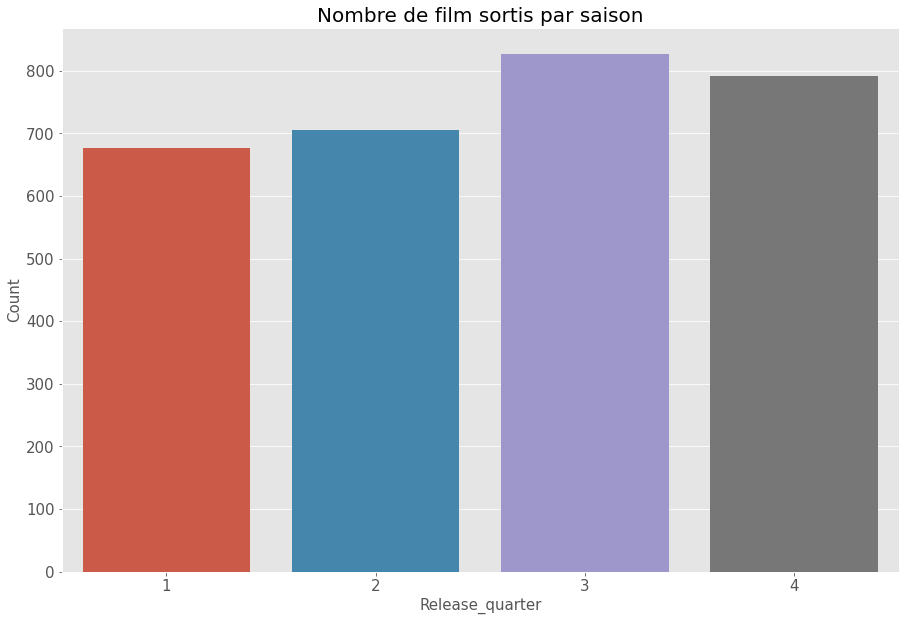

In [18]:
# Visualisation du nombre de film sortie par saison
plt.figure(figsize=(15,10))
sns.countplot(vis_train['release_quarter'].sort_values())

plt.xlabel('Release_quarter', fontsize = 15)
plt.xticks(fontsize = 15)

plt.ylabel('Count', fontsize = 15)
plt.yticks(fontsize = 15)

plt.title('Nombre de film sortis par saison', fontsize = 20)
plt.savefig('Graphs/Nombre de film sortis par saison.png')
plt.show()

#### Visualisation de la moyenne de 'revenue' par rapport à d'autre variable

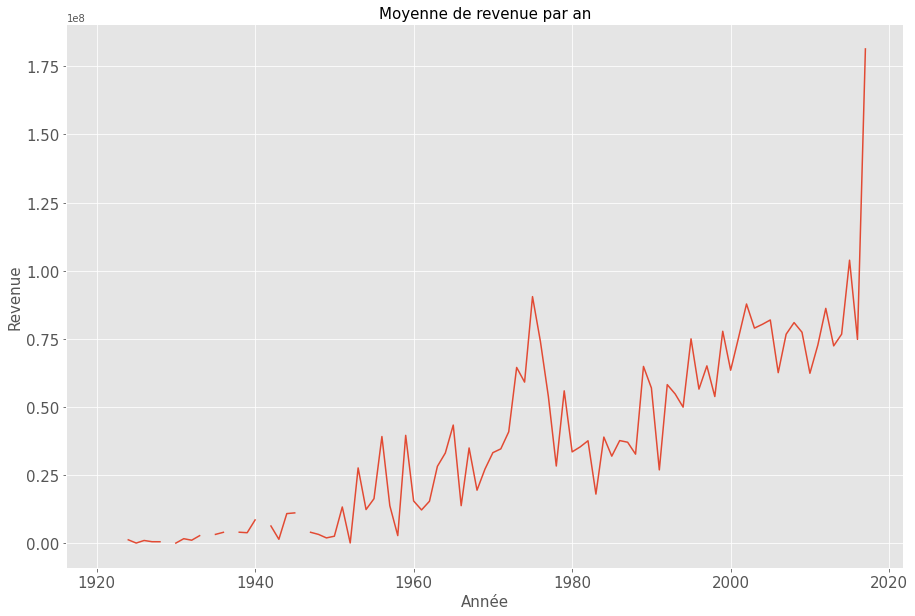

In [19]:
# Visualisation de l'évolution de la courbe de revenue par an
# Création d'une variable 'revenue_mean'
vis_train['meanRevenueByYear'] = vis_train.groupby('release_year')['revenue'].aggregate('mean')

# Création de notre graphique
vis_train['meanRevenueByYear'].plot(figsize=(15,10))

plt.ylabel('Revenue', fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Année', fontsize = 15)
plt.xticks(fontsize = 15)

plt.title('Moyenne de revenue par an', fontsize = 15)
plt.savefig('Graphs/Moyenne de revenue par an.png')
plt.show()

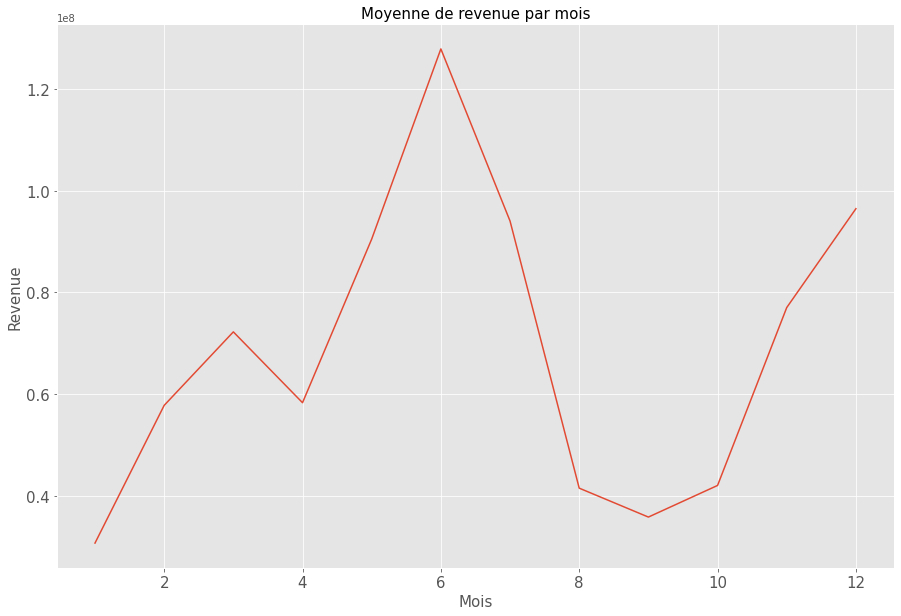

In [20]:
# Visualisation de l'évolution de la courbe de revenue par mois
# Création d'une variable 'revenue_mean'
vis_train['meanRevenueByMonths'] = vis_train.groupby('release_month')['revenue'].aggregate('mean')

# Création de notre graphique
vis_train['meanRevenueByMonths'].plot(figsize=(15,10))

plt.ylabel('Revenue', fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Mois', fontsize = 15)
plt.xticks(fontsize = 15)

plt.title('Moyenne de revenue par mois', fontsize = 15)
plt.savefig('Graphs/Moyenne de revenue par mois.png')
plt.show()

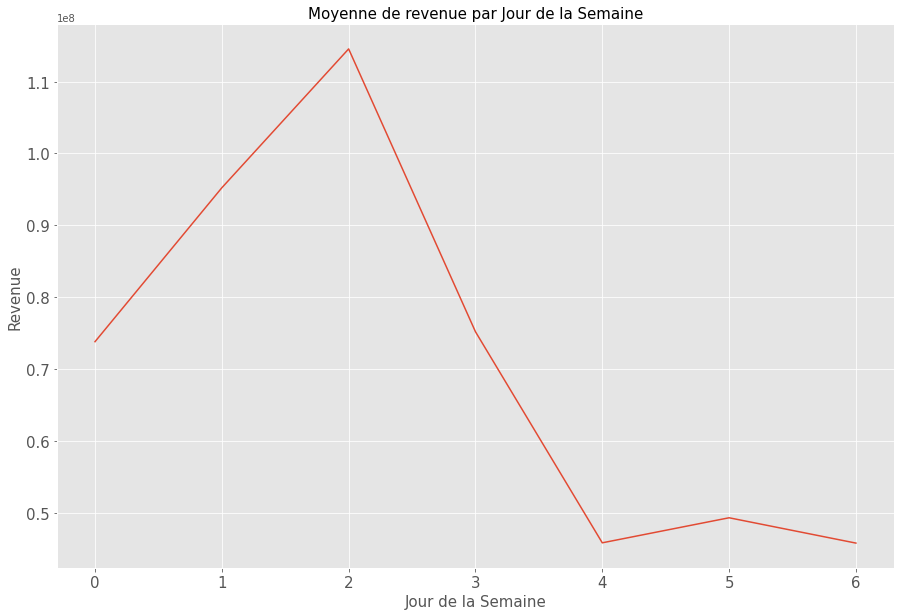

In [21]:
# Visualisation de l'évolution de la courbe de revenue par jour de la semaine
# Création d'une variable 'revenue_mean'
vis_train['meanRevenueByDayOfWeek'] = vis_train.groupby('release_dayofweek')['revenue'].aggregate('mean')

# Création de notre graphique
vis_train['meanRevenueByDayOfWeek'].plot(figsize=(15,10))

plt.ylabel('Revenue', fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Jour de la Semaine', fontsize = 15)
plt.xticks(fontsize = 15)

plt.title('Moyenne de revenue par Jour de la Semaine', fontsize = 15)
plt.savefig('Graphs/Moyenne de revenue par Jour de la Semaine.png')
plt.show()

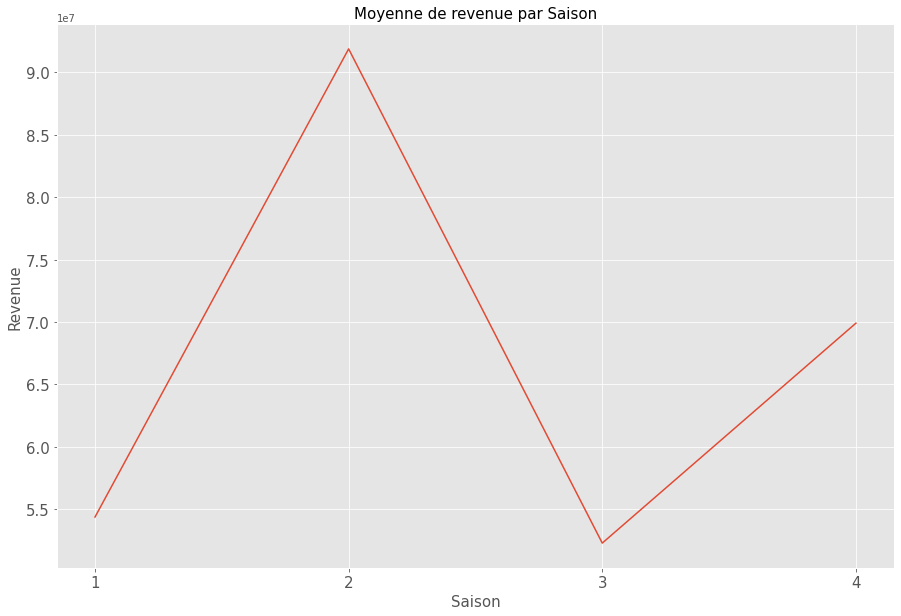

In [22]:
# Visualisation de l'évolution de la courbe de revenue par saison
# Création d'une variable 'revenue_mean'
vis_train['meanRevenueByQuarter'] = vis_train.groupby('release_quarter')['revenue'].aggregate('mean')

# Création de notre graphique
vis_train['meanRevenueByQuarter'].plot(figsize=(15,10))

plt.ylabel('Revenue', fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Saison', fontsize = 15)
plt.xticks(np.arange(1, 5, 1), fontsize = 15)

plt.title('Moyenne de revenue par Saison', fontsize = 15)
plt.savefig('Graphs/Moyenne de revenue par Saison.png')
plt.show()

#### Observons maintenent l'évolution de la durée des films au fil des ans

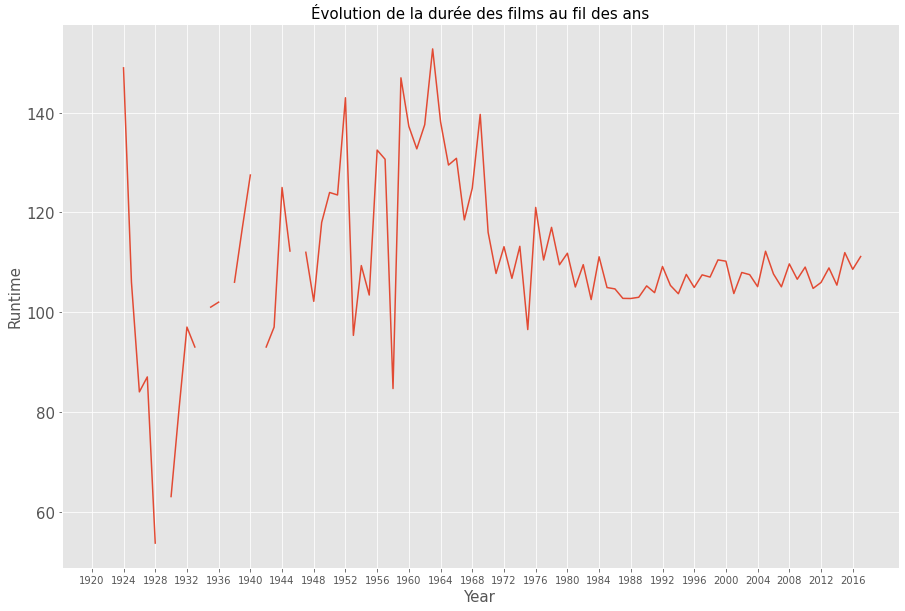

In [23]:
# Observons maintenent l'évolution de la durée des films au fil des ans
# Création de notre variable 'moyenne_runtime'
vis_train['meanruntimeByYear'] = vis_train.groupby('release_year')['runtime'].aggregate('mean')

# Création de notre graphique
vis_train['meanruntimeByYear'].plot(figsize=(15,10))

plt.ylabel('Runtime', fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Year', fontsize = 15)
plt.xticks(np.arange(1920, 2018, 4), fontsize = 10)

plt.title('Évolution de la durée des films au fil des ans', fontsize = 15)
plt.savefig('Graphs/Évolution de la durée des films au fil des ans.png')
plt.show()

#### Observons maintenent l'évolution de la popularité des films au fil des ans

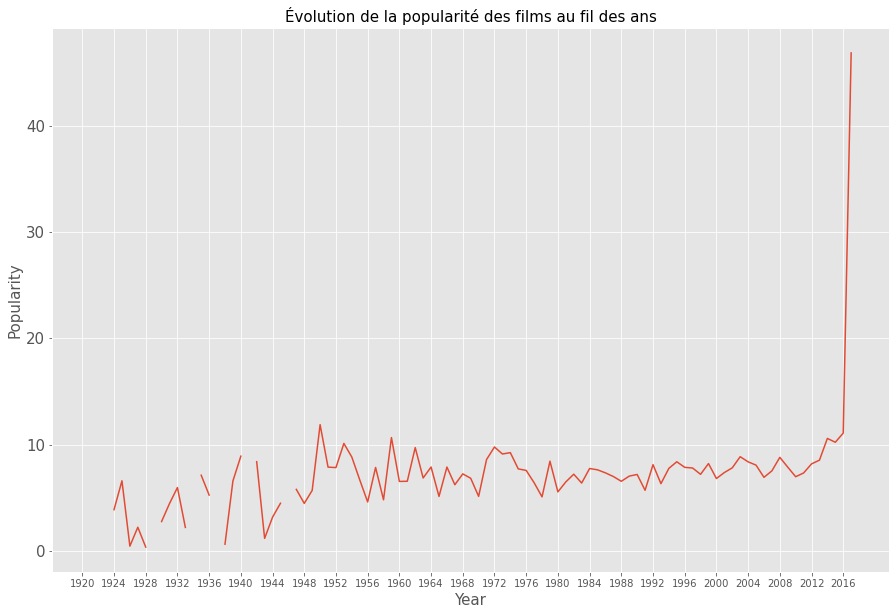

In [24]:
# Observons maintenent l'évolution de la popularité des films au fil des ans
# Création de notre variable 'moyenne_popularity'
vis_train['meanPopularityByYear'] = vis_train.groupby('release_year')['popularity'].aggregate('mean')

# Création de notre graphique
vis_train['meanPopularityByYear'].plot(figsize=(15,10))

plt.ylabel('Popularity', fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Year', fontsize = 15)
plt.xticks(np.arange(1920, 2018, 4), fontsize = 10)

plt.title('Évolution de la popularité des films au fil des ans', fontsize = 15)
plt.savefig('Graphs/Évolution de la popularité des films au fil des ans.png')
plt.show()

#### Observons maintenent l'évolution du budget des films au fil des ans

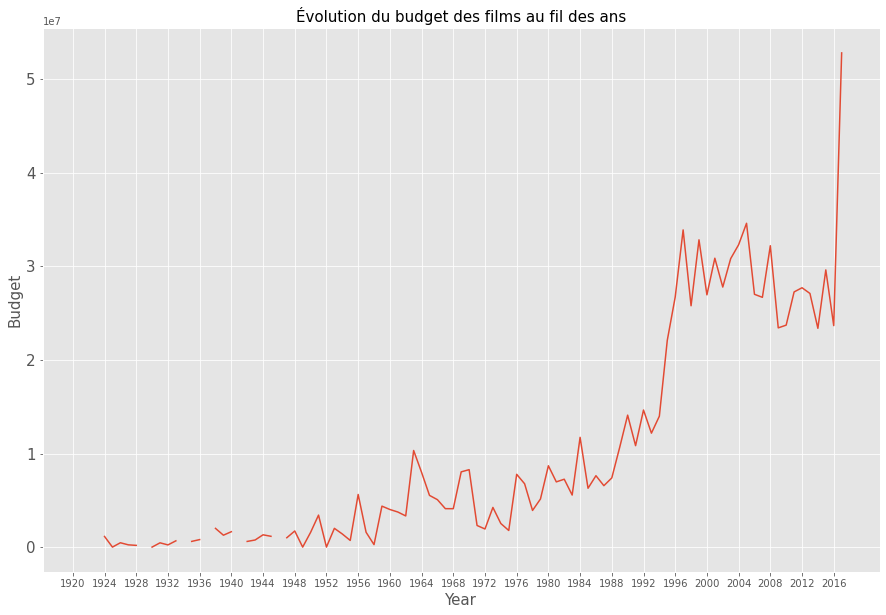

In [25]:
# Observons maintenent l'évolution du budget des films au fil des ans
# Création de notre variable 'moyenne_budget'
vis_train['meanBudgetByYear'] = vis_train.groupby('release_year')['budget'].aggregate('mean')

# Création de notre graphique
vis_train['meanBudgetByYear'].plot(figsize=(15,10))

plt.ylabel('Budget', fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Year', fontsize = 15)
plt.xticks(np.arange(1920, 2018, 4), fontsize = 10)

plt.title('Évolution du budget des films au fil des ans', fontsize = 15)
plt.savefig('Graphs/Évolution du budget des films au fil des ans.png')
plt.show()

### Les genres de film

In [26]:
# Création d'une variable qui va stocké les variables intéressant pour réaliser un graphique du genre les plus populaires
data_genre = vis_train[['id', 'original_title', 'genres', 'release_date', 'release_year', 'revenue']]

# Remplissage des valeurs manquantes par la valeur 'None'.
data_genre.loc[:, "genres"] = data_genre.loc[:,"genres"].fillna("None")
display(data_genre.head())
print(data_genre.isna().sum())

,id,original_title,genres,release_date,release_year,revenue
0,1,Hot Tub Time Machine 2,"[{'id': 35, 'name': 'Comedy'}]",2/20/15,2015,12314651
1,2,The Princess Diaries 2: Royal Engagement,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8/6/04,2004,95149435
2,3,Whiplash,"[{'id': 18, 'name': 'Drama'}]",10/10/14,2014,13092000
3,4,Kahaani,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3/9/12,2012,16000000
4,5,마린보이,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",2/5/09,2009,3923970


id                0
original_title    0
genres            0
release_date      0
release_year      0
revenue           0
dtype: int64


In [27]:
# Création d'une fonction qui va différencier les différents 'genres' de film
def extract_genres(row):
    if row == "None":
        return "None"
    else:
        results = re.findall(r"'name': '(\w+\s?\w+\s?\w+)'", row) # Il permet de trouver le mot 'name' dans chaque individus et de le retourner
        return results

# Application de notre fonction sur notre variable 'genres'    
data_genre["genres"] = data_genre["genres"].apply(extract_genres)
data_genre.head(10)

,id,original_title,genres,release_date,release_year,revenue
0,1,Hot Tub Time Machine 2,[Comedy],2/20/15,2015,12314651
1,2,The Princess Diaries 2: Royal Engagement,"[Comedy, Drama, Family, Romance]",8/6/04,2004,95149435
2,3,Whiplash,[Drama],10/10/14,2014,13092000
3,4,Kahaani,"[Thriller, Drama]",3/9/12,2012,16000000
4,5,마린보이,"[Action, Thriller]",2/5/09,2009,3923970
5,6,Pinocchio and the Emperor of the Night,"[Animation, Adventure, Family]",8/6/87,1987,3261638
6,7,The Possession,"[Horror, Thriller]",8/30/12,2012,85446075
7,8,Control Room,[Documentary],1/15/04,2004,2586511
8,9,Muppet Treasure Island,"[Action, Comedy, Music, Family, Adventure]",2/16/96,1996,34327391
9,10,A Mighty Wind,"[Comedy, Music]",4/16/03,2003,18750246


In [28]:
# Création d'un dataframe qui aura pour index les individus et comme variable les mot contenu dans les [] de la variable 'genres'
# qui seront stacké et retourner dans une liste array à un seul exemplaire
unique_genres = data_genre["genres"].apply(pd.Series).stack().unique()
print("Number of genres: {}".format(len(unique_genres)))
print("Genres: {}".format(unique_genres))

Number of genres: 21
Genres: ['Comedy' 'Drama' 'Family' 'Romance' 'Thriller' 'Action' 'Animation'
 'Adventure' 'Horror' 'Documentary' 'Music' 'Crime' 'Science Fiction'
 'Mystery' 'Foreign' 'Fantasy' 'War' 'Western' 'History' 'None' 'TV Movie']


In [29]:
# Addition de tous les genres dans notre variable 'genres'
genres_total = pd.get_dummies(data_genre["genres"].apply(pd.Series).stack()).sum()
genres_total.sort_values(inplace=True, ascending=False)
genres_total

Drama              1531
Comedy             1028
Thriller            789
Action              741
Romance             571
Crime               469
Adventure           439
Horror              301
Science Fiction     290
Family              260
Fantasy             232
Mystery             225
Animation           141
History             132
Music               100
War                 100
Documentary          87
Western              43
Foreign              31
None                  7
TV Movie              1
dtype: int64

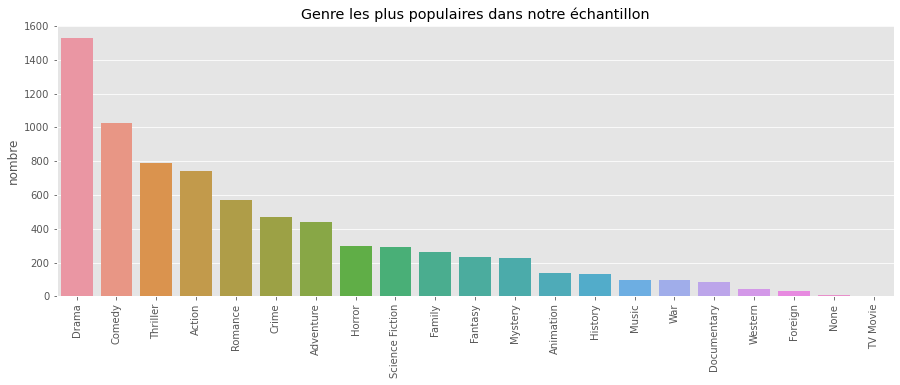

In [30]:
# Création de notre graphique sur le nombre de genre de film dans notre échantillon 'train'
plt.figure(figsize = (15,5))
ax = sns.barplot(x = genres_total.index, y = genres_total.values)
plt.xticks(rotation = 90)
plt.title("Genre les plus populaires dans notre échantillon")
plt.ylabel("nombre")
plt.savefig('Graphs/Genre_les_plus_populaires')
plt.show()

In [31]:
# Insertion des genres de films dans notre dataframe avec la fonction 'reindex' néanmoins avec des valeurs = 0
# suspicion => les '*' permettent d'adapter le nombre d'individus
genres_pp = data_genre.reindex(columns = [*data_genre.columns.tolist(), *unique_genres], fill_value = 0)
genres_pp.head()

,id,original_title,genres,release_date,release_year,revenue,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,None,TV Movie
0,1,Hot Tub Time Machine 2,[Comedy],2/20/15,2015,12314651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,The Princess Diaries 2: Royal Engagement,"[Comedy, Drama, Family, Romance]",8/6/04,2004,95149435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Whiplash,[Drama],10/10/14,2014,13092000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Kahaani,"[Thriller, Drama]",3/9/12,2012,16000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,마린보이,"[Action, Thriller]",2/5/09,2009,3923970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Si les genres contenu dans 'unique_genres' sont dans 'genres_pp' alors on ajoute '1' dans le genre en question à la place de 0
# ex => 'Hot Tub Time Machine 2' appartient au genre de 'Comedy' alors on ajoute 1 dans la variable 'Comedy' de l'individu
for index, row in genres_pp.iterrows():
    for genre in unique_genres:
        if genre in row["genres"]:
            genres_pp.loc[index, genre] = 1

In [33]:
# Regroupement par année tout en additionnant le nombre de genre apparu cette année-là
genres_by_years = genres_pp.groupby("release_year")[unique_genres].sum()
genres_by_years.rename(columns={"Science Fiction":"Sci-Fi"}, inplace=True)
genres_by_years.head()

,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Sci-Fi,Mystery,Foreign,Fantasy,War,Western,History,None,TV Movie
release_year,,,,,,,,,,,,,,,,,,,,,
1921,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1924,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1925,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1926,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1927,1,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


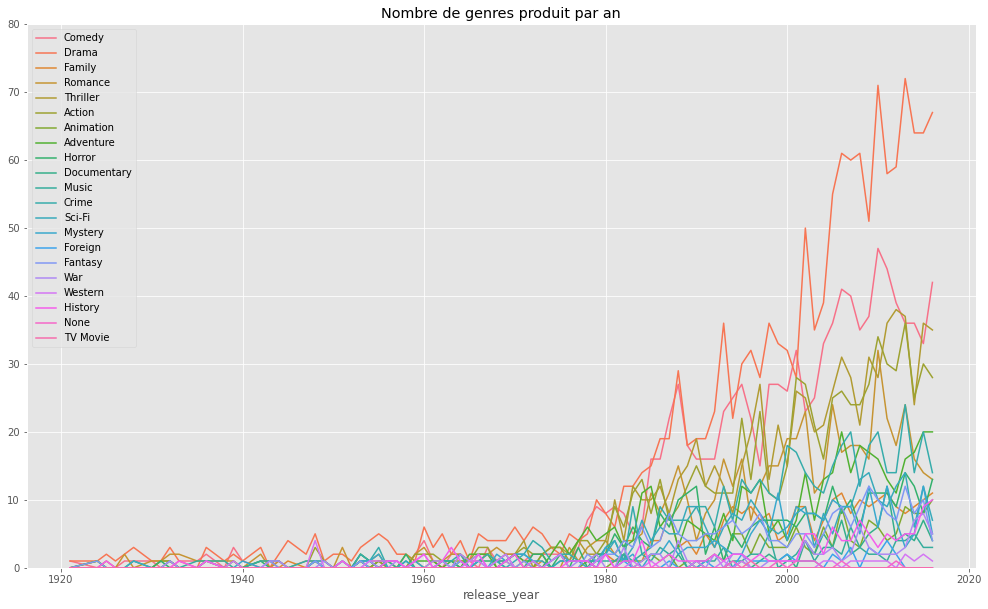

In [34]:
# Création d'un graphique sur l'évolution du genre des films dans notre échantillon
plt.figure(figsize = (17,10))
sns.lineplot(data = genres_by_years[:-1], dashes=False)
plt.ylim([0,80])
plt.title("Nombre de genres produit par an")
plt.show()

On peut constater sur ce graphique que la production de film à explosé dans les années 80' avec une nettre domination de film du genre :
- 1. Drama
- 2. Comedy
- 3. Action

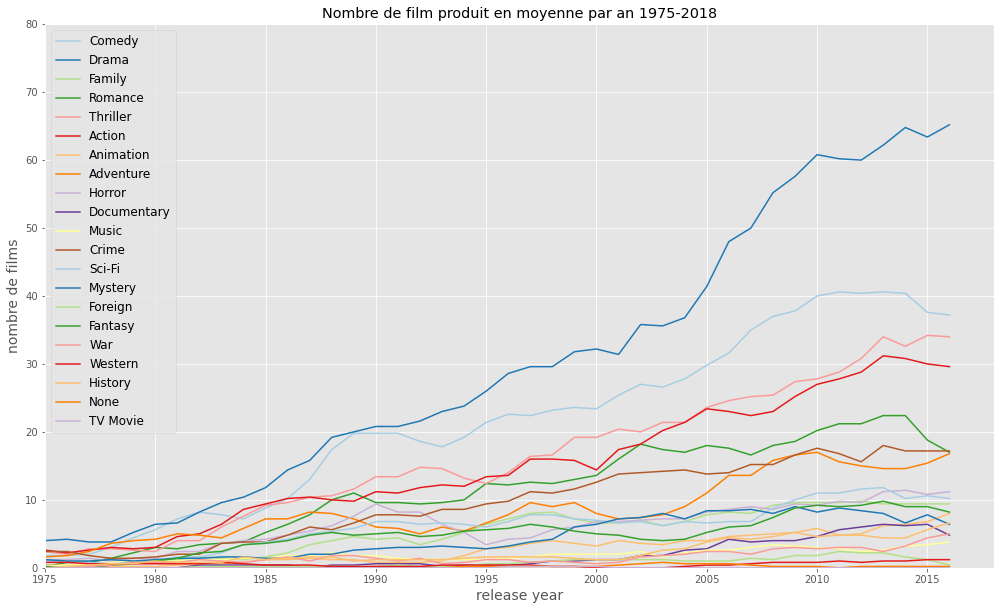

In [35]:
# rolling => 
genres_by_years_5yrs = genres_by_years.rolling(5).mean()

# Dimension de notre graphique
plt.figure(figsize = (17,10))
plt.xlim([1975,2018])
plt.ylim([0,80])

# Legendes des axes
plt.xlabel("release year", size = 14)
plt.ylabel("nombre de films", size = 14)

# Réalisation du graphique
sns.lineplot(data = genres_by_years_5yrs[:-1], dashes = False, palette = "Paired") # dashes = True => pontillé, False => ligne
plt.legend(prop = {'size': 12}) # Dimension des charactères
plt.title("Nombre de film produit en moyenne par an 1975-2018")

plt.savefig('Graphs/Moyenne_de_film_produit_par_an')
plt.show()

#### Quels languages est le plus populaire auprès de notre échantillon ?

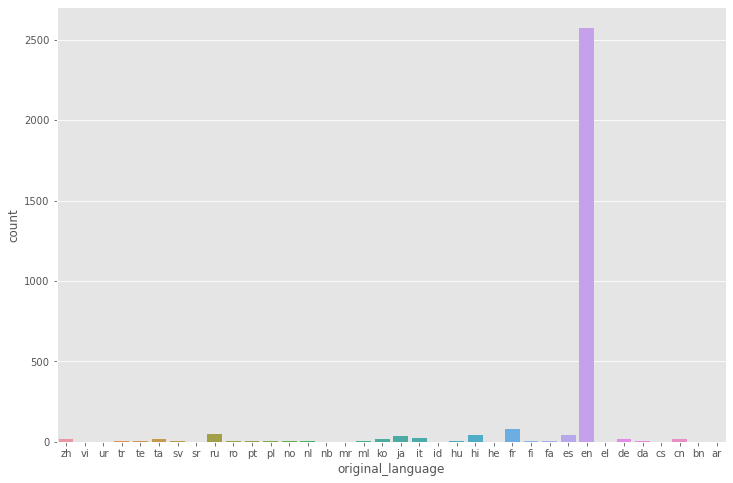

In [36]:
# Création de notre graphique pour connaitre le nombre de film par language
plt.figure(figsize=(12,8))
sns.countplot(vis_train['original_language'].sort_values(ascending = False))
plt.show()

On n'arrive pas trop à distinguer les films qui ont un language différent de l'englais essayons d'y voir un peu plus claire 

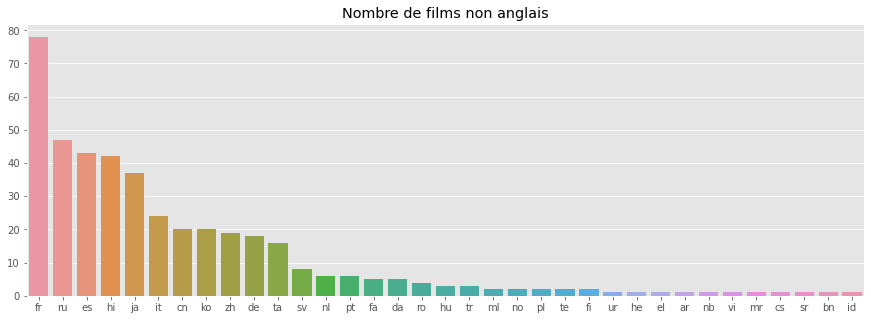

In [37]:
# Mise à l'écart de la valeur 'en' de notre variable
non_english = vis_train['original_language'][vis_train['original_language'] != "en"].value_counts()

# Création de notre graphique
plt.figure(figsize = (15,5))
sns.barplot(x = non_english.index, y = non_english.values)
plt.title("Nombre de films non anglais")
plt.show()

#### Quels sont les films qui ont eu le plus de revenue de notre échantillon ?

In [38]:
# Top 5 des films ayant la meilleur recette de notre échantillon
vis_train.sort_values(by = 'revenue', ascending = False)[['title', 'revenue', 'release_year']][:20]

,title,revenue,release_year
1126,The Avengers,1519557910,2012
1761,Furious 7,1506249360,2015
2770,Avengers: Age of Ultron,1405403694,2015
684,Beauty and the Beast,1262886337,2017
2322,Transformers: Dark of the Moon,1123746996,2011
906,The Dark Knight Rises,1084939099,2012
2135,Pirates of the Caribbean: On Stranger Tides,1045713802,2011
2562,Finding Dory,1028570889,2016
881,Alice in Wonderland,1025491110,2010
734,Zootopia,1023784195,2016


#### Qui à produit le plus de films dans notre échantillon ?

In [39]:
# Stockag des variables qui vont être utilisé dans notre fonction
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

# Application de notre fonction sur nos données
dfx = text_to_dict(train)
for col in dict_columns:
       train[col] = dfx[col] 

Nous allons effectuer la même opération que pour les genres de film

In [40]:
# lambda qui va stocker les valeurs 'production_companies' dans une liste
x = train['production_companies'].apply(lambda x : [x[i]['name'] for i in range(len(x))] if x != {} else []).values

# la fonction 'Counter()' va compter les valeurs j(name) dans x(production_companies) pour les valeurs i dans j(name)
Counter([i for j in x for i in j]).most_common(10)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61)]

#### Quels sont les personnages de l'équipe technique le plus présent dans notre échantillon ?

In [41]:
crew = train['crew'].apply(lambda x:[i['name'] for i in x] if x != {} else [])
Counter([i for j in crew for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

#### Quels sont les acteurs les plus présents dans notre échantillon ?

In [42]:
cast = train['cast'].apply(lambda x:[i['name'] for i in x] if x != {} else [])
Counter([i for j in cast for i in j]).most_common(15)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

#### Visualisation des corrélations entre nos variables

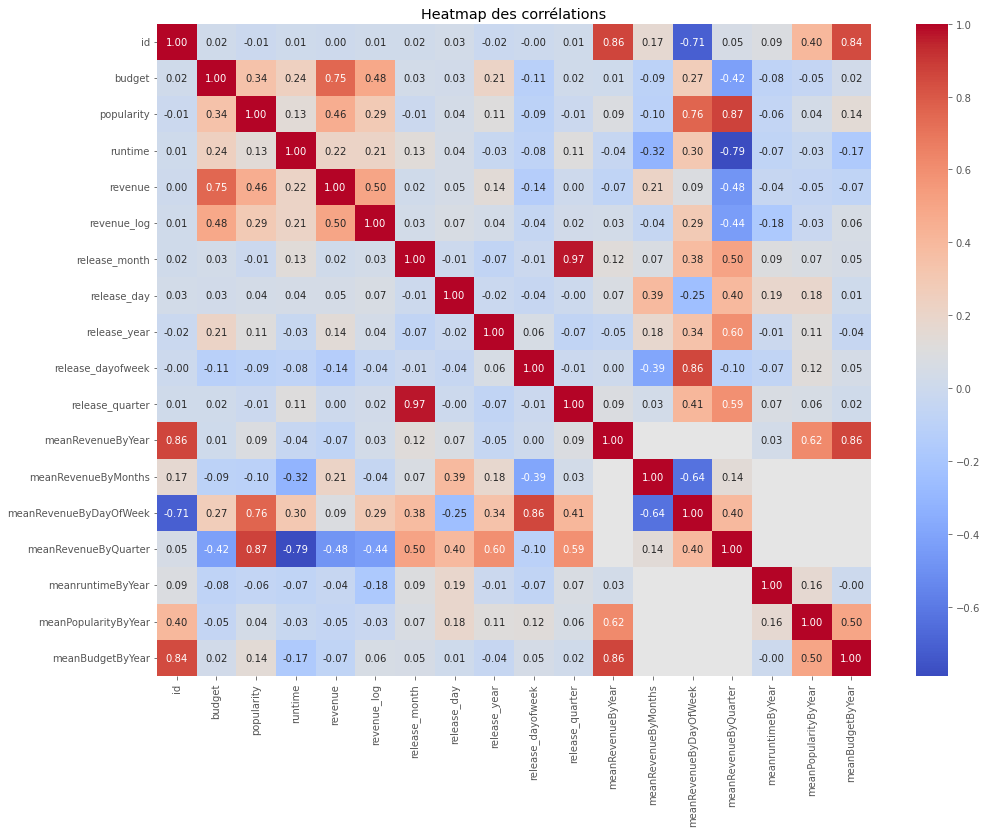

In [43]:
# Sélection des variables à l'origine de notre dataframe
train_corr = vis_train.corr()

# Création d'une heatmap de notre matrice des corrélations
plt.figure(figsize=(16,12))
sns.heatmap(train_corr, annot=True, fmt='.2f', cmap = 'coolwarm')
plt.title('Heatmap des corrélations')

plt.savefig('Graphs/Heatmap des corrélations')
plt.show()

In [44]:
# Sauvegarde de notre dataframe
train.to_csv('train_new.csv', index = False)